Output()

Output()

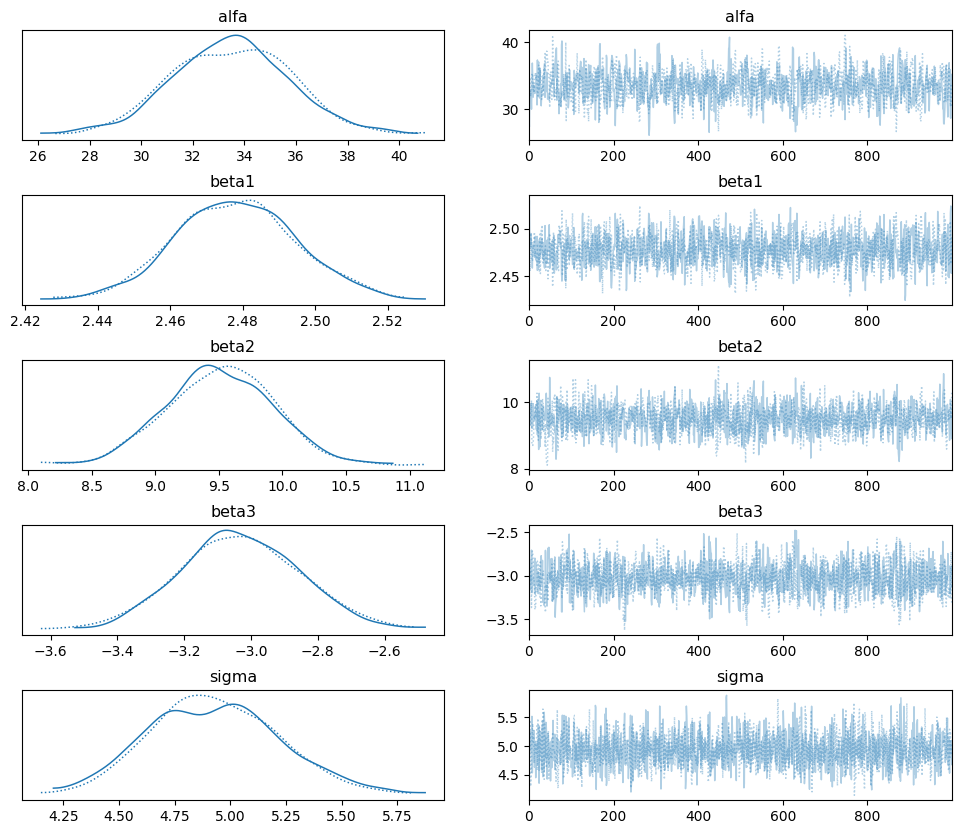

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alfa,33.493,2.314,28.687,37.896,0.074,0.053,972.0,990.0,1.00
beta1,2.478,0.017,2.448,2.513,0.000,0.000,1401.0,1296.0,1.00
beta2,9.510,0.420,8.699,10.286,0.011,0.008,1363.0,1053.0,1.00
beta3,-3.033,0.179,-3.362,-2.664,0.005,0.004,1286.0,1268.0,1.01
sigma,4.932,0.291,4.389,5.513,0.006,0.005,2058.0,1425.0,1.00


In [7]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

estate_data = pd.read_csv("real_estate_data.csv")

x1 = estate_data["Surface_area"].values
x2 = estate_data["Rooms"].values
x3 = estate_data["Distance_to_center"].values
y = estate_data["Price"].values

# modelul de regresie liniara multipla
with pm.Model() as model:

    alfa = pm.Normal("alfa", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)
    beta3 = pm.Normal("beta3", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = alfa + beta1 * x1 + beta2 * x2 + beta3 * x3

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

az.plot_trace(trace)
plt.subplots_adjust(hspace=0.5)
plt.show()

az.summary(trace, hdi_prob=0.95)
